# Notes in chapter 8
1. At a minimum, the arguments we provide to nn.Conv2d are the number of input features (or channels, since we’re dealing with multichannel images: that is, more than one value per pixel), the number of output features, and the size of the kernel.
2. As usual, we need to add the zeroth batch dimension with unsqueeze if we want to call the conv module with one input image, since nn.Conv2d expects a B × C × H × W shaped tensor as input:

## 8.1 The case for convolutions

## 8.2 Convolutions in action

In [17]:
import torch.nn as nn

conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [18]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [19]:
from torchvision import datasets

data_path = 'data/ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

from torchvision import transforms

transformd_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ])
)
transformd_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4943, 0.4852, 0.4506), (0.2467, 0.2429, 0.2616))
    ]))

label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformd_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformd_cifar10_val if label in [0, 2]]

In [20]:

len(cifar2), len(cifar2_val)

(10000, 2000)

In [21]:
img, _ = cifar2[0]
conv = nn.Conv2d(3, 16, kernel_size=3)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

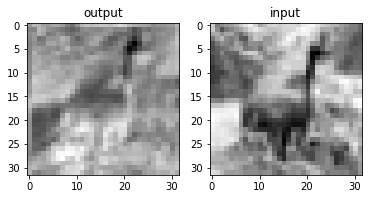

In [30]:
from matplotlib import pyplot as plt 

plt.subplot(1, 2, 1)
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.title("output")

plt.subplot(1, 2, 2)
plt.imshow(img[0], cmap='gray')
plt.title("input")
plt.show()

In [23]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [31]:
import torch

with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9)

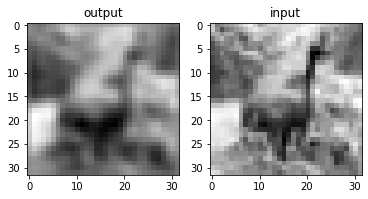

In [34]:
output = conv(img.unsqueeze(0))

plt.subplot(1, 2, 1)
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.title("output")

plt.subplot(1, 2, 2)
plt.imshow(img[0], cmap='gray')
plt.title("input")
plt.show()

In [35]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [39]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    # missing something important
    nn.Linear(8*8*8, 32),
    nn.Tanh(),
    nn.Linear(32, 2)
)

In [40]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

## 8.3 Subclassing nn.Module